### Exploratory Analysis

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [3]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)

In [5]:
#Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [6]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# winequality-red.csv has 1599 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/content/winequality-red.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'winequality-red.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 12 columns


In [7]:
df1.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Distribution graphs (histogram/bar graph) of sampled columns

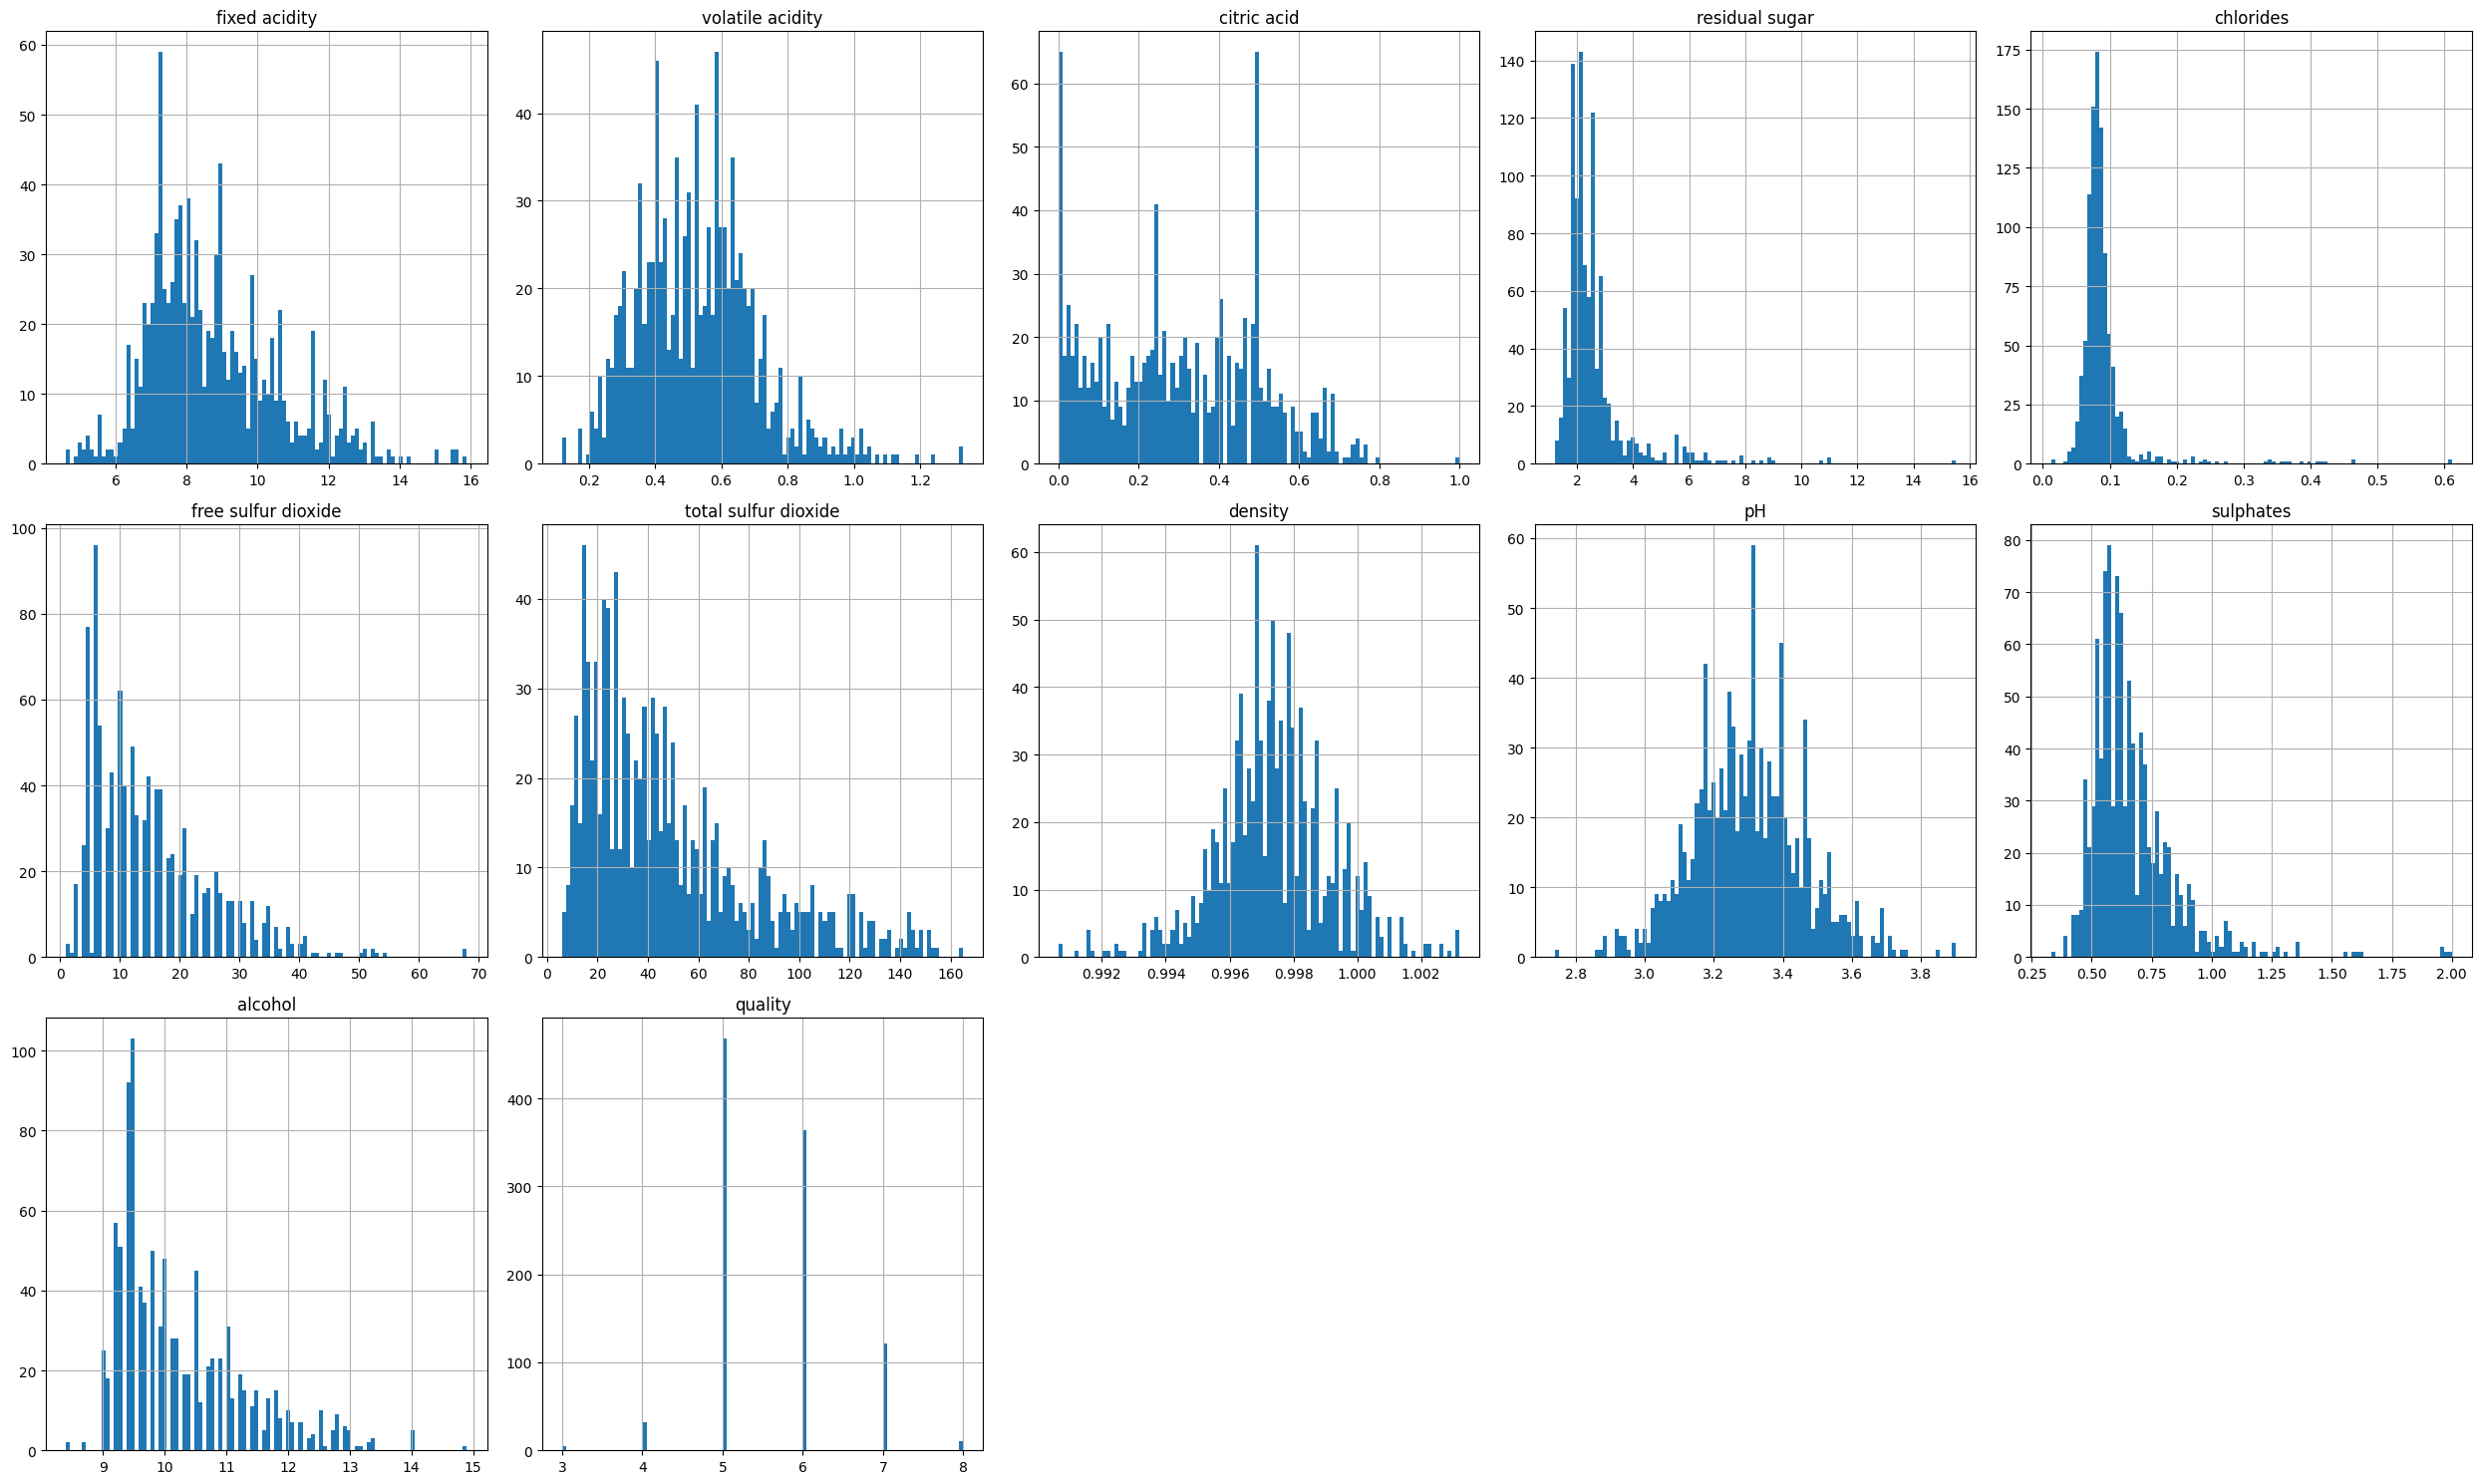

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nCols = df.shape[1]
    nRows = np.ceil(nCols / nGraphPerRow).astype(int)

    plt.figure(figsize=(nGraphPerRow * 5, nRows * 5))

    for i in range(nCols):
        plt.subplot(nRows, nGraphPerRow, i + 1)
        column_df = df.iloc[:, i]
        if np.issubdtype(column_df.dtype, np.number):
            column_df.hist(bins=100)
        else:
            column_df.value_counts().plot(kind='bar')
        plt.title(df.columns[i])

    plt.tight_layout()
    plt.show()

# Assuming df1 is your DataFrame
plotPerColumnDistribution(df1, 10, 5)


### Correlation matrix:

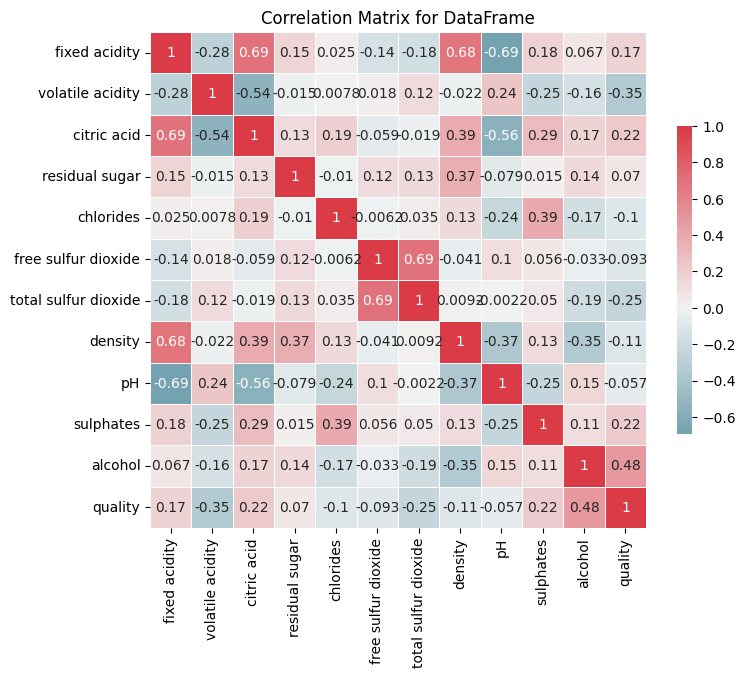

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plotCorrelationMatrix(df, graphWidth):
    # Drop columns with NaN values
    df = df.dropna(axis='columns')

    # Keep columns with more than 1 unique value
    df = df[[col for col in df if df[col].nunique() > 1]]

    if df.shape[1] < 2:
        name = getattr(df, 'name', 'DataFrame')
        print(f"Not enough columns to create a correlation matrix for dataframe '{name}'")
        return

    # Compute the correlation matrix
    corr = df.corr()

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(graphWidth, graphWidth))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap
    sns.heatmap(corr, cmap=cmap, center=0, square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

    name = getattr(df, 'name', 'DataFrame')
    plt.title(f'Correlation Matrix for {name}')
    plt.show()

# Assuming df1 is your DataFrame
df1.name = "Dataset Name"  # Add a name attribute to the DataFrame if not already present
plotCorrelationMatrix(df1, 8)


## Scatter and density plots:

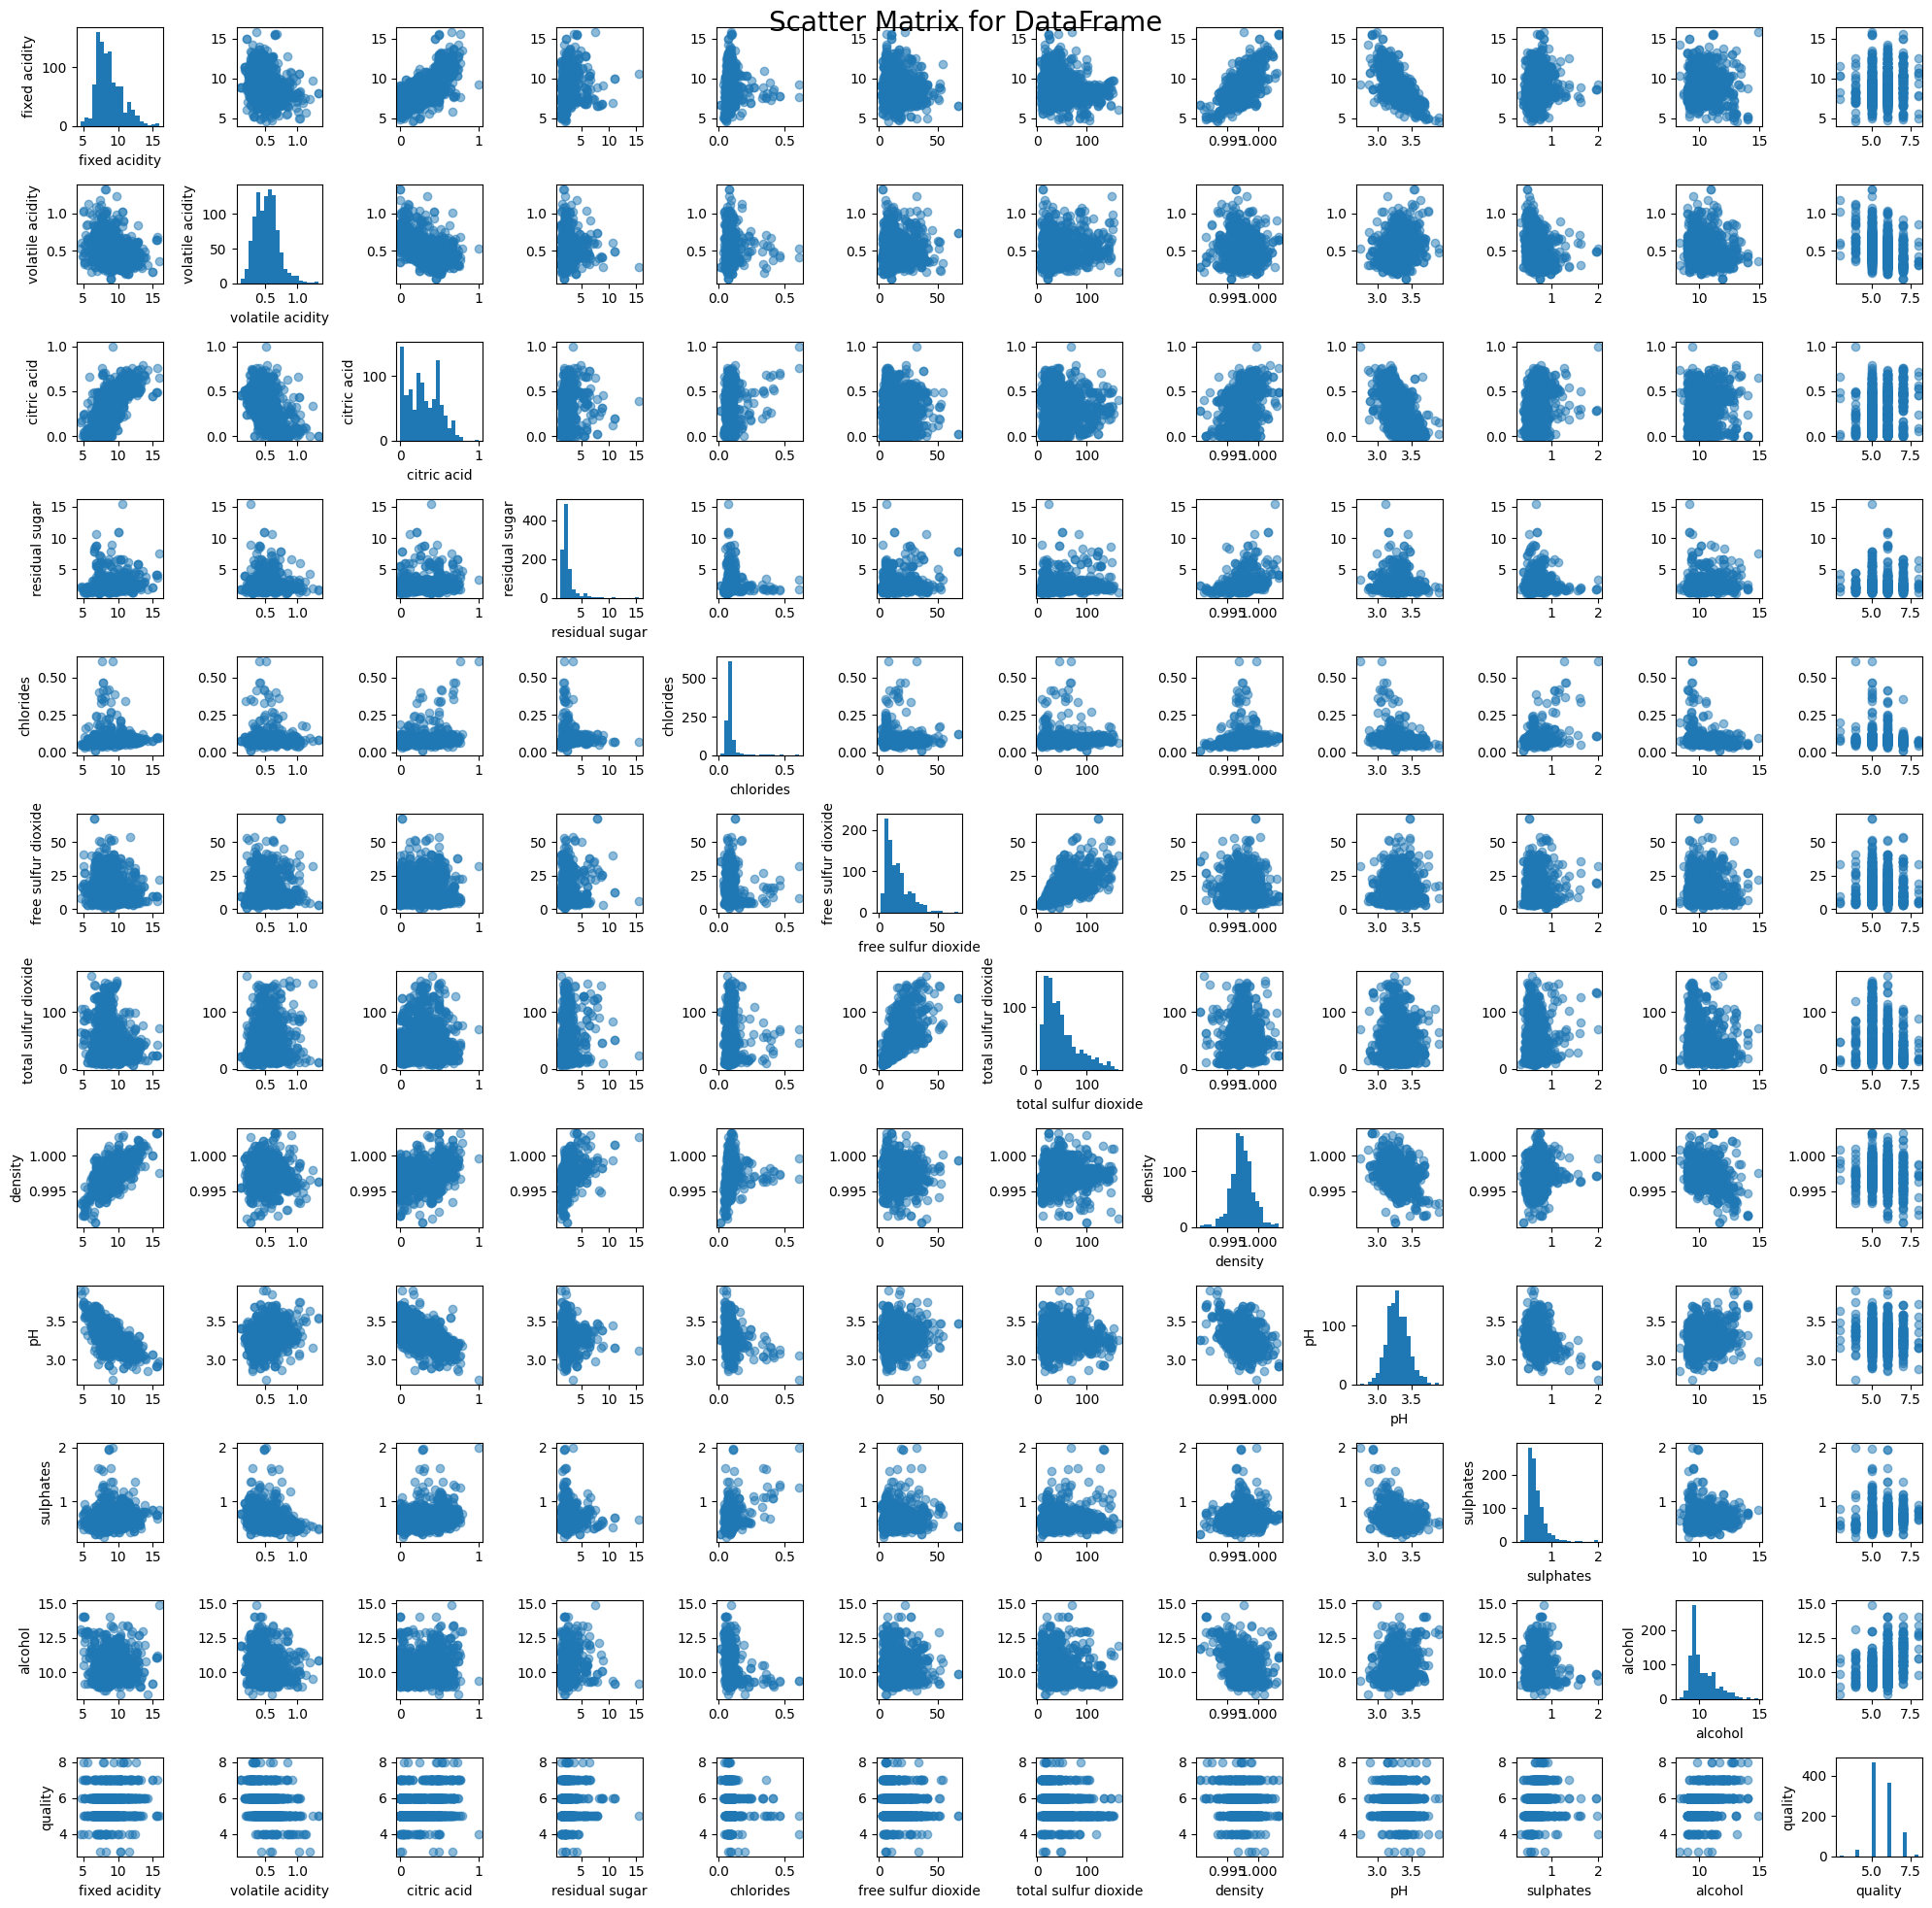

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plotScatterMatrix(df, plotSize, textSize):
    # Select only numerical columns
    df = df.select_dtypes(include=[np.number])

    # Drop columns with NaN values
    df = df.dropna(axis='columns')

    # Keep columns with more than 1 unique value
    df = df[[col for col in df if df[col].nunique() > 1]]

    if df.shape[1] < 2:
        name = getattr(df, 'name', 'DataFrame')
        print(f"Not enough columns to create a scatter matrix for dataframe '{name}'")
        return

    columnNames = list(df)
    numColumns = len(columnNames)
    fig, axes = plt.subplots(nrows=numColumns, ncols=numColumns, figsize=(plotSize, plotSize))

    for i in range(numColumns):
        for j in range(numColumns):
            if i == j:
                axes[i, j].hist(df[columnNames[i]], bins=20)
                axes[i, j].set_xlabel(columnNames[i], fontsize=textSize)
                axes[i, j].set_ylabel(columnNames[j], fontsize=textSize)
            else:
                axes[i, j].scatter(df[columnNames[j]], df[columnNames[i]], alpha=0.5)
                if i == numColumns - 1:
                    axes[i, j].set_xlabel(columnNames[j], fontsize=textSize)
                if j == 0:
                    axes[i, j].set_ylabel(columnNames[i], fontsize=textSize)

    plt.suptitle(f'Scatter Matrix for {getattr(df, "name", "DataFrame")}', size=20)
    plt.tight_layout()
    plt.show()

# Assuming df1 is your DataFrame
df1.name = "Dataset Name"  # Add a name attribute to the DataFrame if not already present
plotScatterMatrix(df1, 20, 10)
